In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [253]:
df.drop(columns=['duration','default','pdays','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','loan',], inplace=True)
df.head(3)

,age,job,marital,education,housing,contact,month,day_of_week,campaign,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,telephone,may,mon,1,0,nonexistent,no
1,57,services,married,high.school,no,telephone,may,mon,1,0,nonexistent,no
2,37,services,married,high.school,yes,telephone,may,mon,1,0,nonexistent,no


In [254]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns='y')
y = df['y']    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape


(32950, 11)

In [255]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dtc.fit(X_train, y_train)
X.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'contact', 'month',
       'day_of_week', 'campaign', 'previous', 'poutcome'],
      dtype='object')

✅ Accuracy: 0.8958485069191552

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7303
           1       0.67      0.16      0.26       935

    accuracy                           0.90      8238
   macro avg       0.79      0.57      0.60      8238
weighted avg       0.88      0.90      0.87      8238



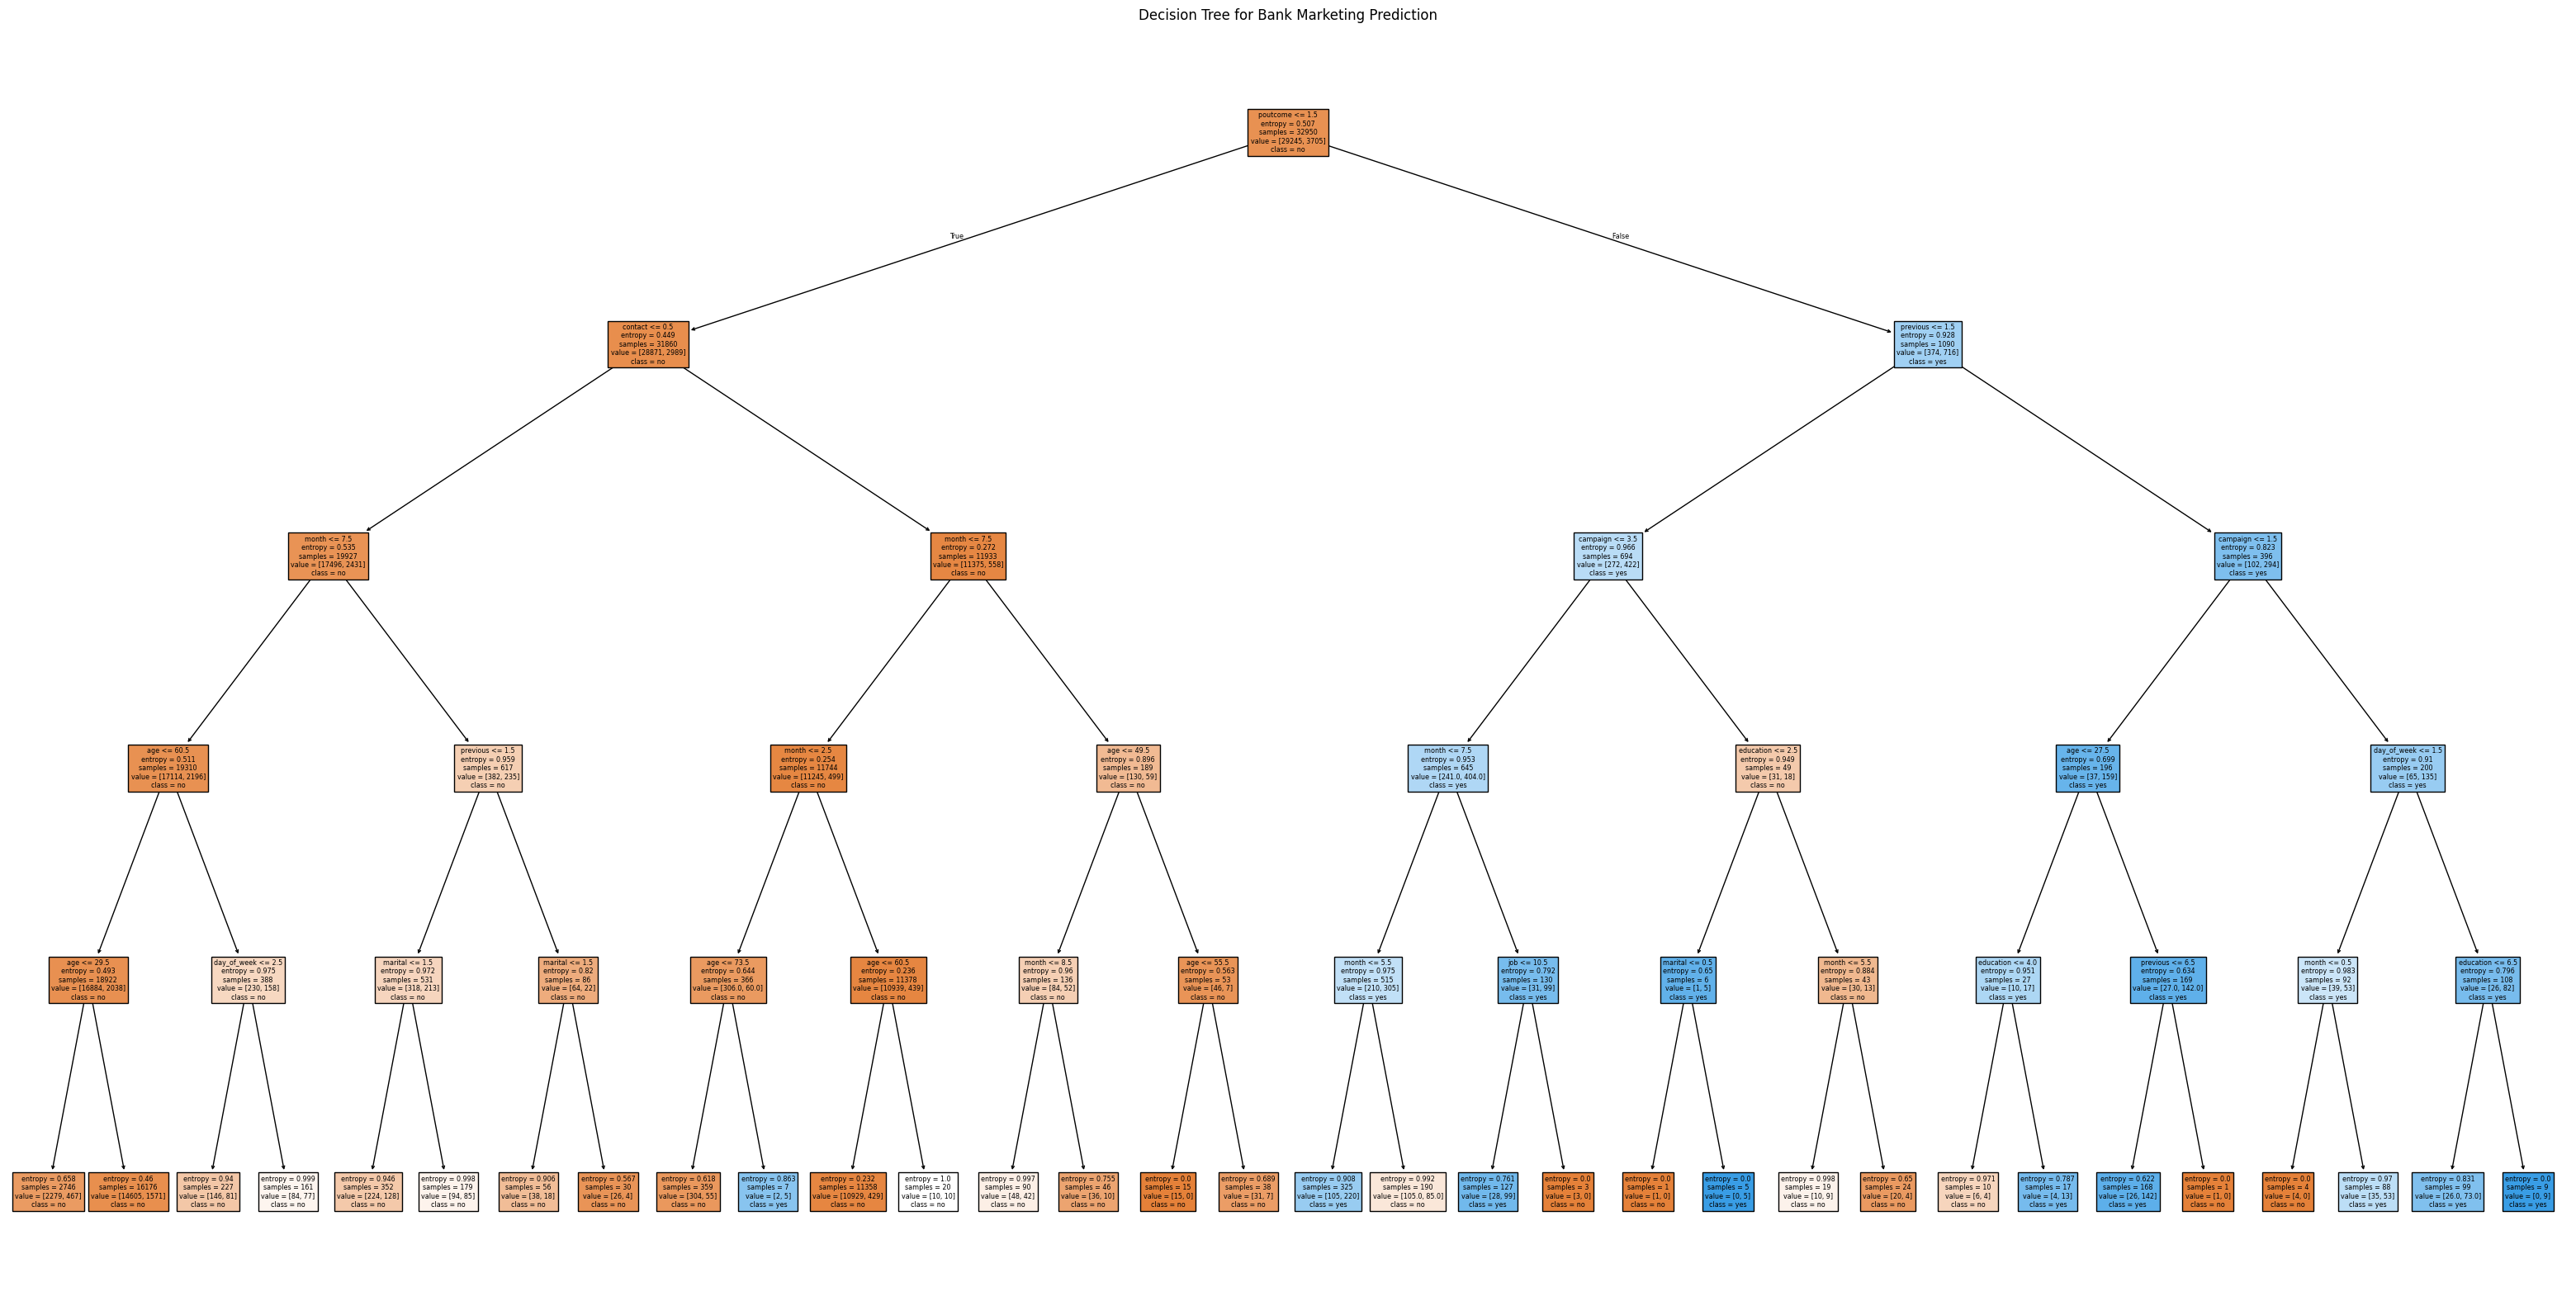

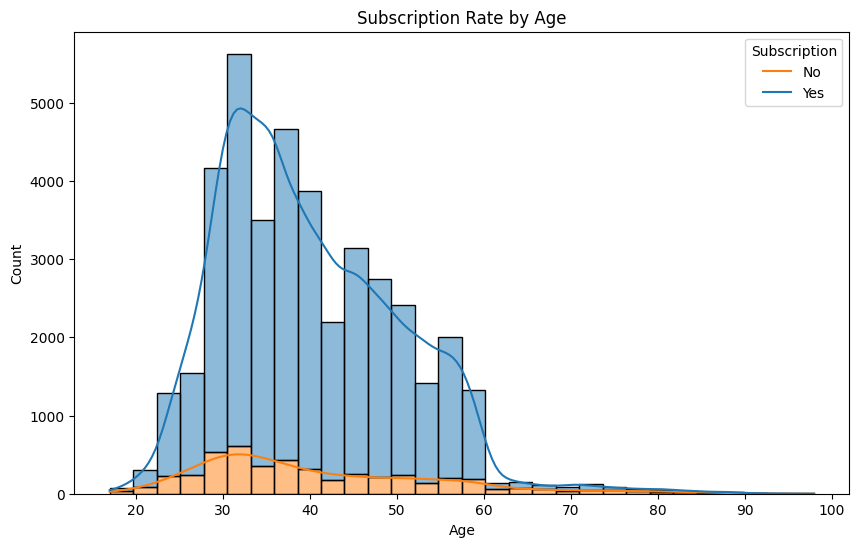

Success Rate by Education Level:
education
illiterate             22.22
unknown                14.50
university.degree      13.72
professional.course    11.35
high.school            10.84
basic.4y               10.25
basic.6y                8.20
basic.9y                7.82
dtype: float64


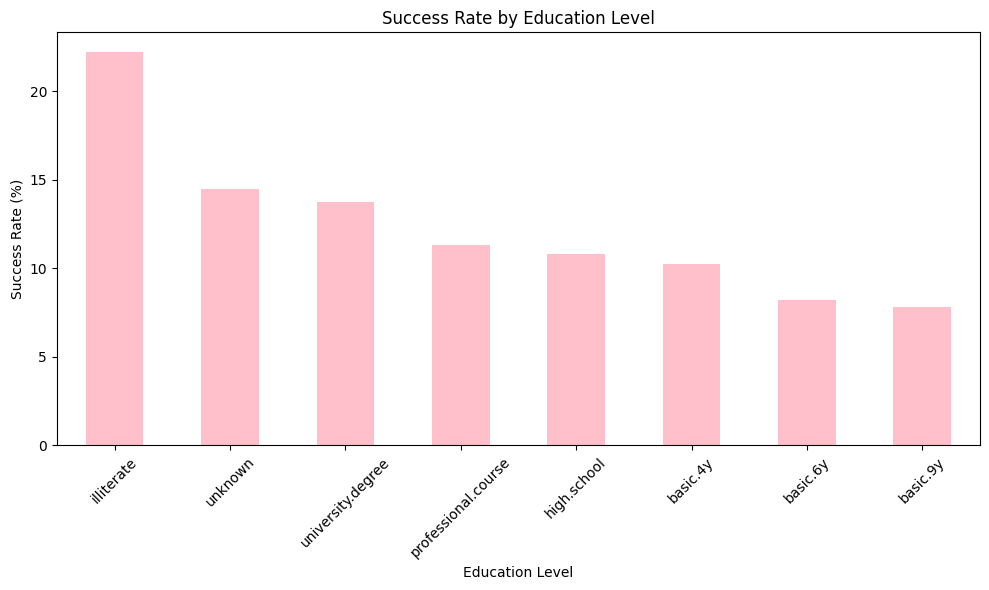

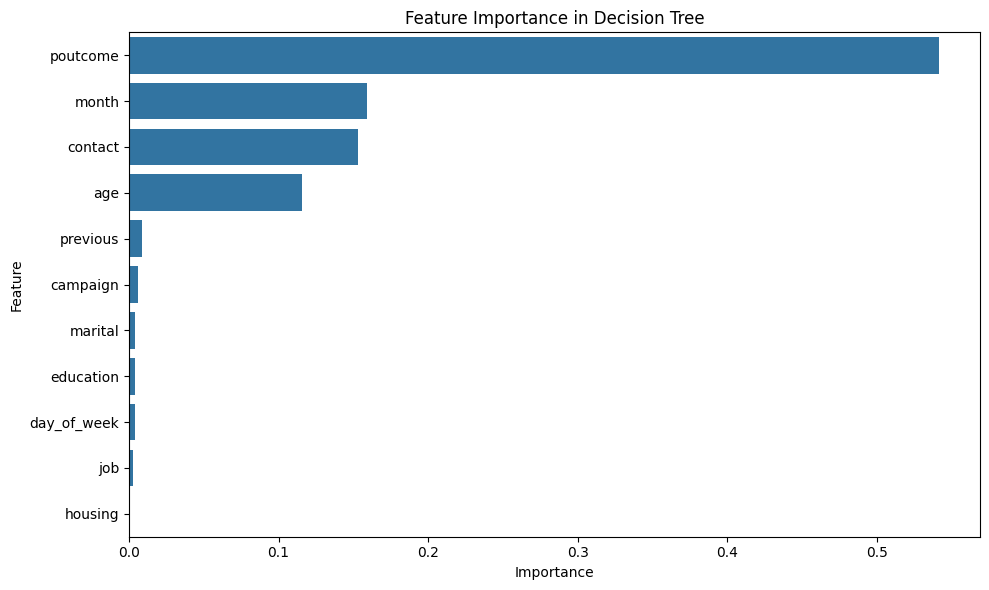

In [256]:
y_pred = dtc.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

#PLOT 1
plt.figure(figsize=(40, 20))
plot_tree(dtc, feature_names=X.columns, class_names=label_encoders['y'].classes_, filled=True)
plt.title("Decision Tree for Bank Marketing Prediction")
plt.show()

#PLOT 2
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='y', bins=30, kde=True, multiple='stack')
plt.title("Subscription Rate by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title='Subscription', labels=['No', 'Yes'])
plt.show()

#PLOT 3

success_rate = (data[data['y'] == 'yes'].groupby('education').size() / data.groupby('education').size() * 100).sort_values(ascending=False)
print("Success Rate by Education Level:")
print(success_rate.round(2))
plt.figure(figsize=(10, 6))
success_rate.plot(kind='bar', color='pink')

plt.title("Success Rate by Education Level")
plt.ylabel("Success Rate (%)")
plt.xlabel("Education Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#PLOT 4
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': dtc.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance in Decision Tree")
plt.tight_layout()
plt.show()